<a href="https://colab.research.google.com/github/dilliraj1987/Ex6_Face/blob/main/FaceMask_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Karan-Malik/FaceMaskDetector # Clone the data from Karan-Malik Public github page

Cloning into 'FaceMaskDetector'...
remote: Enumerating objects: 1543, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 1543 (delta 44), reused 72 (delta 31), pack-reused 1454
Receiving objects: 100% (1543/1543), 84.40 MiB | 32.82 MiB/s, done.
Resolving deltas: 100% (61/61), done.


## **Importing Required Libraries**

In [ ]:
import numpy as np # Import Numpy
import keras # Import keras
import keras.backend as k # Import backend function from keras as x
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense # Importing Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense functions from keras.layer
from keras.models import Sequential,load_model # Importing Sequential,load_model functions from keras.model
#from keras.optimizers import adam
from keras.preprocessing import image #Import function image from keras.preprocessing
import cv2 # Import Computer Vision version2 funtions
import datetime # Import date and time

## **Data Augmentation and Preprocessing**

In [ ]:
import tensorflow as tf # Import Tensorflow function as tf
from keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator function from keras.preprocessing.image

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True) # Input training images are rescaled as 256, shear and zoom range = 20% for image preprocessing and horizontal flip applied for all images

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255) # Input test images are rescaled as 256 in size

In [ ]:
training_set = train_datagen.flow_from_directory(
        '/content/FaceMaskDetector/train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary') # The resoultion of each image of training set is fixed as 150x150; batch_size = 16; and class mode as binary

Found 1314 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
        '/content/FaceMaskDetector/test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary') # The resoultion of each image of testing set is fixed as 150x150; batch_size = 16; and class mode as binary

Found 194 images belonging to 2 classes.


## **Model Preparation**

In [ ]:
model=Sequential() # CNN Model prepared in sequential mode
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3))) # 2D Conv_layer with No. of filters = 32, Kernel size = 3x3; Activation function as relu and fixing input shape as 150x150x3
model.add(MaxPooling2D()) # Performing max_pooling function from MaxPooling2D funtion with default pool_size value as 1
model.add(Conv2D(32,(3,3),activation='relu')) # 2D Conv_layer with No. of filters = 32, Kernel size = 3x3; Activation function as relu
model.add(MaxPooling2D()) # Performing max_pooling function from MaxPooling2D funtion with default pool_size value as 1
model.add(Conv2D(32,(3,3),activation='relu')) # 2D Conv_layer with No. of filters = 32, Kernel size = 3x3; Activation function as relu
model.add(MaxPooling2D()) # Performing max_pooling function from MaxPooling2D funtion with default pool_size value as 1
model.add(Flatten()) # Flatten layer to make the input data from max_pooling as 1D array
model.add(Dense(100,activation='relu')) # Dense layer 1 with 100 hidden layers with activation function as relu
model.add(Dense(1,activation='sigmoid')) # Dense layer 2 with 1 output layer with activation function as sigmoid

In [ ]:
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy']) # Compilation to optimize the CNN with adam; loss = binary_crossentropy and measures metrics accuracy for training and testing

In [ ]:
model_saved=model.fit_generator(
        training_set,
        epochs=15,
        validation_data=test_set,

        )  # Model evaluation of accuracy for both training and validation set with 15 epoches

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/15
83/83 [==============================] - 58s 664ms/step - loss: 0.4328 - accuracy: 0.7686 - val_loss: 0.1385 - val_accuracy: 0.9536
Epoch 2/15
83/83 [==============================] - 48s 579ms/step - loss: 0.1581 - accuracy: 0.9498 - val_loss: 0.1308 - val_accuracy: 0.9691
Epoch 3/15
83/83 [==============================] - 48s 572ms/step - loss: 0.1185 - accuracy: 0.9612 - val_loss: 0.0848 - val_accuracy: 0.9588
Epoch 4/15
83/83 [==============================] - 48s 574ms/step - loss: 0.1032 - accuracy: 0.9650 - val_loss: 0.3654 - val_accuracy: 0.8660
Epoch 5/15
83/83 [==============================] - 47s 568ms/step - loss: 0.1017 - accuracy: 0.9619 - val_loss: 0.0794 - val_accuracy: 0.9691
Epoch 6/15
83/83 [==============================] - 48s 572ms/step - loss: 0.0816 - accuracy: 0.9711 - val_loss: 0.1304 - val_accuracy: 0.9536
Epoch 7/15
83/83 [==============================] - 47s 570ms/step - loss: 0.0735 - accuracy: 0.9711 - val_loss: 0.0947 - val_accuracy: 0.9639

In [ ]:
model.save('mymodel.h5',model_saved) # Save best predicted model as 'mymodel.h5'

In [ ]:
mymodel=load_model('mymodel.h5') # Load saved model

## **Model Prediction Output**

In [ ]:
import cv2 #Import CV2 libraries
import matplotlib.pyplot as plt #Import matplotlib library as plt

In [ ]:
test_image=image.load_img('/content/FaceMaskDetector/test/with_mask/106-with-mask.jpg',
                          target_size=(150,150,3)) # Calling test image from above mentioned file directory path with target size of image as 150*150*3
test_image 
test_image=image.img_to_array(test_image) # Make the test image as 2D array and save it as test_image
test_image=np.expand_dims(test_image,axis=0) #To get the expanded dimensions of an array
if(mymodel.predict(test_image)[0][0] == 0): #if result = 0; Predicting as 'With Mask' else predicting as 'Without Mask'
  print("With Mask")
else:
  print("Without Mask")

With Mask


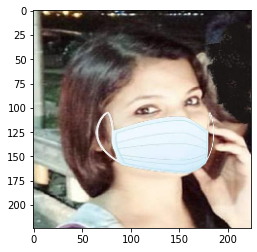

In [ ]:
im = cv2.imread('/content/FaceMaskDetector/test/with_mask/106-with-mask.jpg') # Using CV2 library read the image from directory and name it as 'im'
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR) # Resize image as 224*224 using CV2 function and store it in 'im_resized'

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB)) # Basically CV2 display an image in BGR. So, there is a need for converting the color of an image in to RGB
plt.show() # Plotting the output image in above mentioned image size.

In [ ]:
test_image=image.load_img('/content/FaceMaskDetector/test/without_mask/0.jpg',
                          target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
if(mymodel.predict(test_image)[0][0] == 0):
  print("With Mask")
else:
  print("Without Mask")

Without Mask


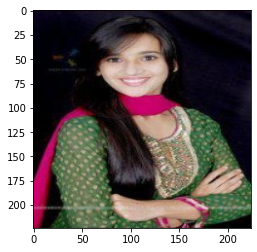

In [ ]:
im = cv2.imread('/content/FaceMaskDetector/test/without_mask/0.jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

## **Real-time Model Testing with java script**

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


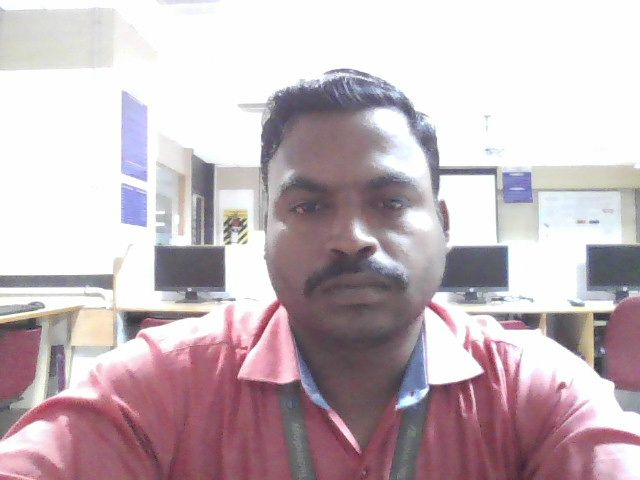

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
test_image=image.load_img(filename,
                          target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
if(mymodel.predict(test_image)[0][0] == 0):
  print("With Mask")
else:
  print("Without Mask")

With Mask
